# About the notebook: Comparison between the Models

In this file, the final results between the different models are shown for better comparision. The **6 simulated models** are:

1. ODE - Euler
2. ODE - Midpoint
3. ODE - Runge-Kutta Third Order
4. SDE - Euler
5. SDE - Midpoint
6. SDE - Runge-Kutta Third Order

The **baseline model** is chosen to be a **linear regression model** trained on n = 10 data points. This number was chosen based on experimentation as can be seen in the indiviudal model files. 

The price **predicted** for the stocks is **1st Decmeber, 2022**

In [1]:
#Adit Jindal
import pandas as pd
from datetime import datetime
import numpy as np
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
import scipy.stats as st
from sklearn.linear_model import LinearRegression
np.set_printoptions(formatter = {'float_kind':'{:f}'.format}, suppress=True)
pd.set_option('display.float_format', lambda x: '%.8f' % x)

# Retreiving trained models

In [2]:
#Load results from pickle files
with open('results_euler.pkl', 'rb') as f:
  results_euler_ode = pickle.load(f)
  print("success")
print(len(results_euler_ode))

with open('results_euler_SDE.pkl', 'rb') as f:
  results_euler_sde = pickle.load(f)
  print("success")
print(len(results_euler_sde))

with open('results_midpoint.pkl', 'rb') as f:
  results_midpoint_ode = pickle.load(f)
  print("success")
print(len(results_midpoint_ode))

with open('results_midpoint_SDE.pkl', 'rb') as f:
  results_midpoint_sde = pickle.load(f)
  print("success")
print(len(results_midpoint_sde))

with open('results_runge.pkl', 'rb') as f:
  results_runge_ode = pickle.load(f)
  print("success")
print(len(results_runge_ode))

with open('results_runge_SDE.pkl', 'rb') as f:
  results_runge_sde = pickle.load(f)
  print("success")
print(len(results_runge_sde))

with open('results_LR.pkl', 'rb') as f:
  results_LR = pickle.load(f)
  print("success")
print(len(results_LR))

price_list = pd.read_csv("prices_S&P.csv")

success
504
success
504
success
504
success
504
success
504
success
504
success
504


In [3]:
price_list = pd.read_csv("prices_S&P.csv")

# Apple Stock Price Estimate

Here, we predict the price of Apple Stock for 1st December 2022 using the 6 different models 

In [4]:
stock_list = price_list.columns[1:][:]

#Structure: True, Prediction, Error
print(results_runge_sde["AAPL"])
print(results_midpoint_sde["AAPL"])
print(results_euler_sde["AAPL"])
print(results_midpoint_ode["AAPL"])
print(results_runge_ode["AAPL"])
print(results_euler_ode["AAPL"])

#Structure: Prediction, True, Error, Score
print(results_LR["AAPL"])

#Create models list
models_list = [results_euler_ode,results_midpoint_ode, results_runge_ode, results_euler_sde, results_midpoint_sde, results_runge_sde, results_LR]

(148.31, 143.1800318358809, 0.03458949608333292)
(148.31, 142.57282579575005, 0.038683663975793633)
(148.31, 148.3588290205992, 0.00032923619849764633)
(148.31, 153.10309720885323, 3.2318098636998354, (145.22, 168.06))
(148.31, 151.95136983664952, 2.455242287539287, (148.46, 156.51))
(148.31, 153.15881797896057, 3.2693803377793595, (148.23, 171.25))
(144.56, 2.5284876272672103, 0.3760860066254882)


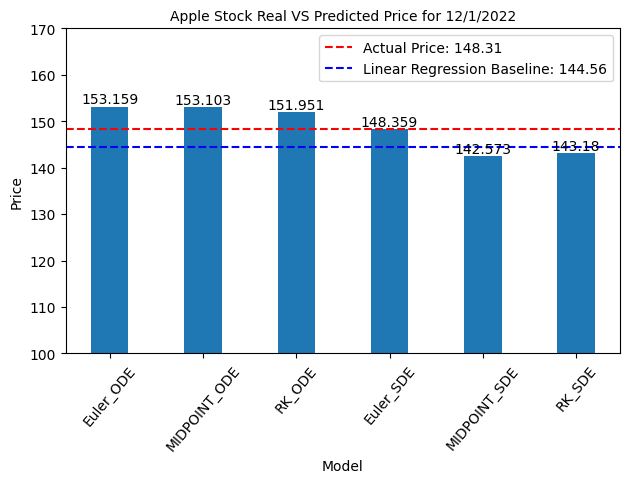

In [5]:
def apple_price_graph(models_list, price_list, stock):

  #Average S&P 500 Error
  actual = price_list.iloc[230][stock]
  lr_baseline = models_list[-1][stock][0]
  y = []
  for model in models_list[:-1]:
    y.append(model[stock][1])

  x = ["Euler_ODE", "MIDPOINT_ODE", "RK_ODE", "Euler_SDE", "MIDPOINT_SDE", "RK_SDE"]

  ind = np.arange(6)
  fig, ax = plt.subplots()
  plt.ylim(bottom=100)
  plt.ylim(top=170)
  bars = ax.bar(ind, y, width = 0.4)
  plt.xticks(ind, x)
  ax.bar_label(bars) 

  ax.set_xlabel('Model')
  ax.set_ylabel('Price')
  plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='center')
  ax.axhline(actual, 0, color='red', label = "Actual Price: %s" %(actual), linestyle='--')
  ax.axhline(lr_baseline, 0, color='blue', label = "Linear Regression Baseline: %s" %(lr_baseline), linestyle='--')

  plt.tight_layout()
  ax.legend(loc = 'upper right')

  font1 = {'color':'black','size':10}

  plt.title("Apple Stock Real VS Predicted Price for 12/1/2022", fontdict = font1)
  plt.show()

apple_price_graph(models_list, price_list, "AAPL")

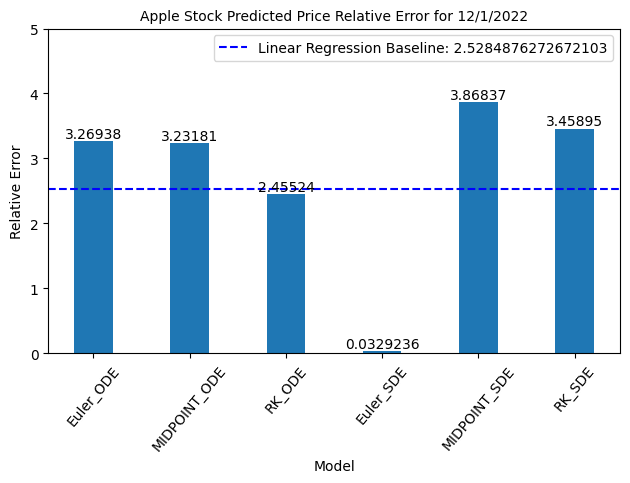

In [6]:
def apple_error_graph(models_list, price_list, stock):

  #Average S&P 500 Error
  actual = price_list.iloc[230][stock]
  lr_baseline = abs((models_list[-1][stock][0] - actual)*100 / actual)
  y = []
  for model in models_list[:-1]:
    pred = model[stock][1]
    error = abs((actual - pred)*100/actual)
    y.append(error)

  x = ["Euler_ODE", "MIDPOINT_ODE", "RK_ODE", "Euler_SDE", "MIDPOINT_SDE", "RK_SDE"]

  ind = np.arange(6)
  fig, ax = plt.subplots()
  # plt.ylim(bottom=100)
  plt.ylim(top=5)
  bars = ax.bar(ind, y, width = 0.4)
  plt.xticks(ind, x)
  ax.bar_label(bars) 

  ax.set_xlabel('Model')
  ax.set_ylabel('Relative Error')
  plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='center')
  ax.axhline(lr_baseline, 0, color='blue', label = "Linear Regression Baseline: %s" %(lr_baseline), linestyle='--')

  plt.tight_layout()
  ax.legend(loc = 'upper right')

  font1 = {'color':'black','size':10}

  plt.title("Apple Stock Predicted Price Relative Error for 12/1/2022", fontdict = font1)
  plt.show()

apple_error_graph(models_list, price_list, "AAPL")

# Average Error Comparison
Here, we see the difference in average error of the models

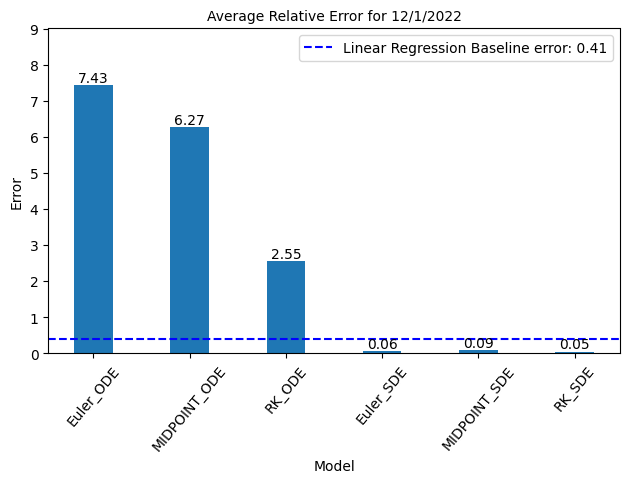

In [7]:
def average_error_graph(models_list):

  #Average S&P 500 Error
  x = ["Euler_ODE", "MIDPOINT_ODE", "RK_ODE", "Euler_SDE", "MIDPOINT_SDE", "RK_SDE"]

  y = []
  lr_baseline = round(np.mean(np.array([a[2] for a in list(models_list[-1].values())])), 2)

  for model in models_list[:-1]:
    errors = round(np.mean(np.array([a[2] for a in list(model.values())])), 2)
    y.append(errors)

  ind = np.arange(6)
  fig, ax = plt.subplots()
  # plt.ylim(bottom=130)
  plt.ylim(top=9)
  bars = ax.bar(ind, y, width = 0.4)
  plt.xticks(ind, x)
  ax.bar_label(bars) 

  ax.set_xlabel('Model')
  ax.set_ylabel('Error')
  plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='center')
  ax.axhline(lr_baseline, 0, color='blue', label = "Linear Regression Baseline error: %s" %(lr_baseline), linestyle='--')

  plt.tight_layout()
  ax.legend(loc = 'upper right')

  font1 = {'color':'black','size':10}

  plt.title("Average Relative Error for 12/1/2022", fontdict = font1)
  plt.show()

average_error_graph(models_list)

# S&P 500 Comparison

Here, we see the true comparison between the models for individual stocks in the S&P 500 as well as the average price of S&P 500

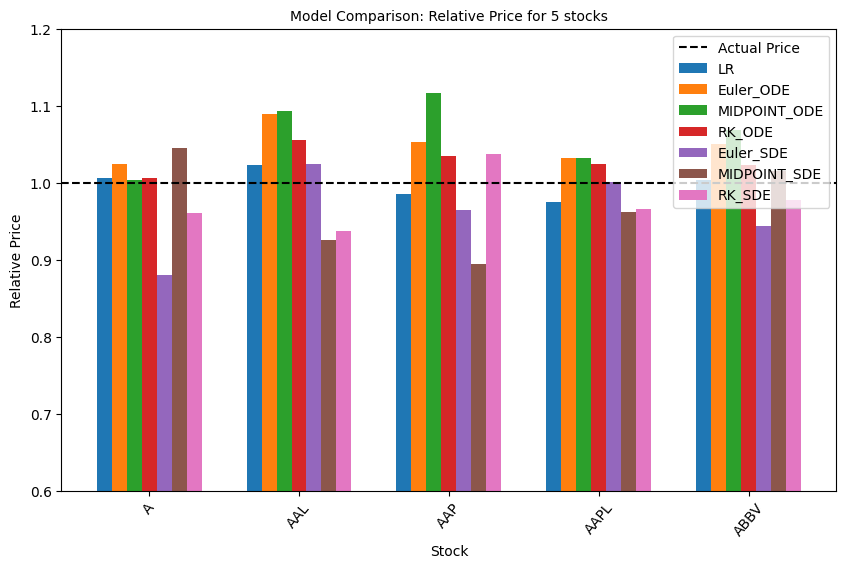

In [8]:
from numpy.lib.index_tricks import index_exp
def stock_price_graph(models_list, start, stop):

  def indexToLabel(index):
    mp = {0: "LR", 1: "Euler_ODE", 2:"MIDPOINT_ODE", 3:"RK_ODE", 4:"Euler_SDE", 5:"MIDPOINT_SDE", 6:"RK_SDE"}
    return mp[index]

  ind = np.arange(stop-start)
  x = np.array(list(models_list[0].keys())[start:stop])
  y_true = np.array([a[0] for a in list(models_list[0].values())[start:stop]])

  y = []

  y_pred_LR = np.array([a[0] for a in list(models_list[-1].values())[start:stop]]) / y_true
  y.append(y_pred_LR)

  for model in models_list[:-1]:
    y_pred = np.array([a[1] for a in list(model.values())[start:stop]]) / y_true
    y.append(y_pred)

  y_true =  np.array([1 for i in range(stop-start+1)])

  fig, ax = plt.subplots(figsize=(10, 6))
  X = np.arange(stop-start) 
  width = 0.1  # the width of the bars
  multiplier = 0
  for index, lst in enumerate(y):
    offset = width * multiplier
    rects = ax.bar(X + offset, lst, width, label = indexToLabel(index))
    multiplier += 1

  plt.ylim(ymax = 1.2, ymin = 0.6) 
  plt.xticks(ind + 0.3, x)

  ax.set_xlabel('Stock')
  ax.set_ylabel('Relative Price')
  ax.legend(loc='upper right', ncols=2)

  ax.axhline(1.0, color='black', label = "Actual Price", linestyle='--')
  ax.legend(loc = 'upper right')

  plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='center')

  font1 = {'color':'black','size':10}
  plt.title("Model Comparison: Relative Price for 5 stocks", fontdict = font1)

  plt.show()

stock_price_graph(models_list, start=0, stop=5)

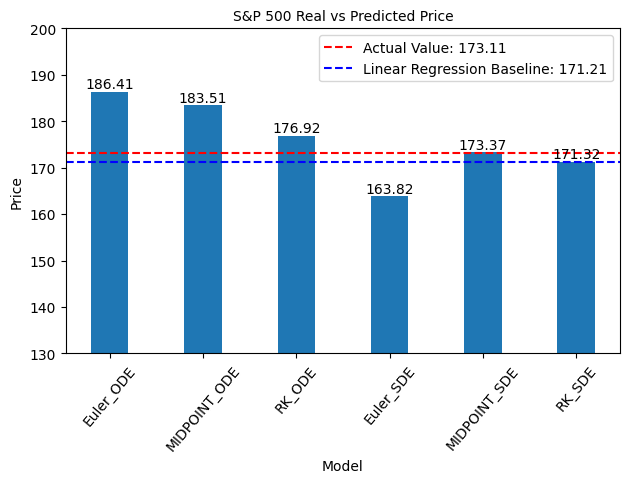

In [9]:
def average_SP_price_graph(models_list):

  #Average S&P 500 Error (equally weighted portfolio)

  x = ["Euler_ODE", "MIDPOINT_ODE", "RK_ODE", "Euler_SDE", "MIDPOINT_SDE", "RK_SDE"]

  y = []
  actual = round(np.mean(np.array([a[0] for a in list(models_list[0].values())])), 2)
  lr_baseline = round(np.mean(np.array([a[0] for a in list(models_list[-1].values())])), 2)
  for model in models_list[:-1]:
    y_pred = round(np.mean(np.array([a[1] for a in list(model.values())])), 2)
    y.append(y_pred)

  ind = np.arange(6)
  fig, ax = plt.subplots()
  plt.ylim(bottom=130)
  plt.ylim(top=200)
  bars = ax.bar(ind, y, width = 0.4)
  plt.xticks(ind, x)
  ax.bar_label(bars) 

  ax.set_xlabel('Model')
  ax.set_ylabel('Price')
  plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='center')
  ax.axhline(actual, 0, color='red', label = "Actual Value: %s" %(actual), linestyle='--')
  ax.axhline(lr_baseline, 0, color='blue', label = "Linear Regression Baseline: %s" %(lr_baseline), linestyle='--')

  plt.tight_layout()
  ax.legend(loc = 'upper right')

  font1 = {'color':'black','size':10}

  plt.title("S&P 500 Real vs Predicted Price", fontdict = font1)
  plt.show()

average_SP_price_graph(models_list)

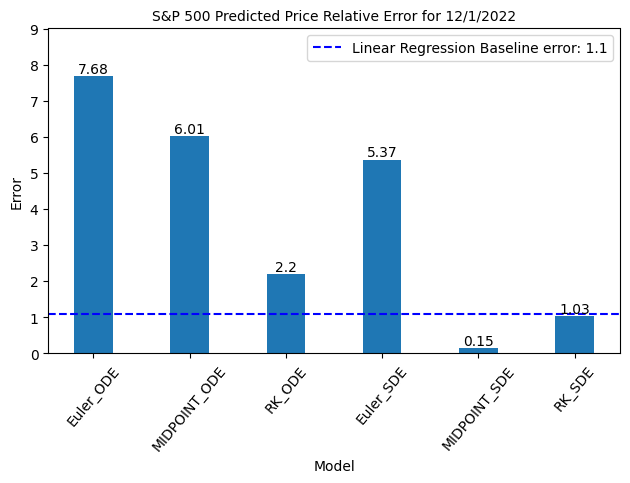

In [10]:
def average_SP_error_graph(models_list):

  #Average S&P 500 Error
  x = ["Euler_ODE", "MIDPOINT_ODE", "RK_ODE", "Euler_SDE", "MIDPOINT_SDE", "RK_SDE"]

  y = []
  actual = round(np.mean(np.array([a[0] for a in list(models_list[0].values())])), 2)
  lr_baseline = round(np.mean(np.array([a[0] for a in list(models_list[-1].values())])), 2)
  lr_baseline_error = round(abs((lr_baseline- actual)*100 / actual), 2)

  for model in models_list[:-1]:
    y_pred = round(np.mean(np.array([a[1] for a in list(model.values())])), 2)
    y_error = round(abs((y_pred - actual)*100 / actual), 2)
    y.append(y_error)

  ind = np.arange(6)
  fig, ax = plt.subplots()
  # plt.ylim(bottom=130)
  plt.ylim(top=9)
  bars = ax.bar(ind, y, width = 0.4)
  plt.xticks(ind, x)
  ax.bar_label(bars) 

  ax.set_xlabel('Model')
  ax.set_ylabel('Error')
  plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='center')
  ax.axhline(lr_baseline_error, 0, color='blue', label = "Linear Regression Baseline error: %s" %(lr_baseline_error), linestyle='--')

  plt.tight_layout()
  ax.legend(loc = 'upper right')

  font1 = {'color':'black','size':10}

  plt.title("S&P 500 Predicted Price Relative Error for 12/1/2022", fontdict = font1)
  plt.show()

average_SP_error_graph(models_list)